In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as op
from scipy import integrate as inte
import math
import eos_no_tem

In [18]:
# 星球参数设置区域
# P_s = 0.0 # 行星表面的压力
# P_center = [48.8,51.0] # 行星中心位置处的压强范围 kbar
Rho_s = 1000 # 行星表面的密度 kg/m^3
T_s = 102.0 # 行星表面的温度 K
# d_T = 3.0 # 对流区域的地温梯度 K/km
R_p = 1.565e6# 行星半径 m
M_p = 4.799844e22 # 行星质量，（0.008个地球质量）kg
g_s = 1.314 # 行星表面的重力, m/s^2

# 输入模型参数
M_h2o = 0.12 # 冰壳的质量分数
M_fe = 0.020 # 铁核的质量分数

step = 500 # 计算步长 km

# 参数计算
M_mgfe2sio4 = 1-M_h2o-M_fe # 硅酸盐幔的质量分数


In [19]:
# 开始计算

# initial

material = ['water']
mass = [M_p]
density = [Rho_s]
# temperature = [T_s]
radius = [R_p]
gravity = [g_s]
pressrue_0 = eos_no_tem.getpressure(density[0], material[0])
pressrue = [pressrue_0]


i = 0 # 计数器

# compute

while radius[-1] != 0:
    i+=1
    radius.append(radius[i-1]-step)
    mass.append(mass[i-1]-eos_no_tem.compute_mass(radius[i-1],radius[i],density[i-1]))
    massfrac = mass[i]/M_p
    if massfrac > 1-M_h2o:
        material.append('water')
    elif M_fe < massfrac <= 1-M_h2o:
        material.append('silicate')
    else:
        material.append('iron')
    gravity.append(gravity[i-1]-eos_no_tem.compute_gravity(radius[i-1],radius[i],density[i-1]))
    pressrue.append(pressrue[i-1]+eos_no_tem.compute_pressure(radius[i-1],radius[i],density[i-1],gravity[i-1]))
    density.append(eos_no_tem.getdensity(pressrue[i],material[i-1]))
    

3131
-4.004170099514613e+21


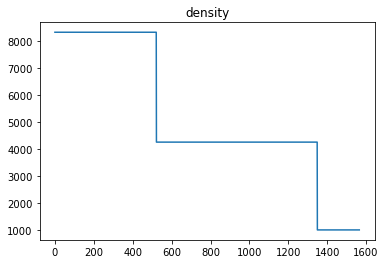

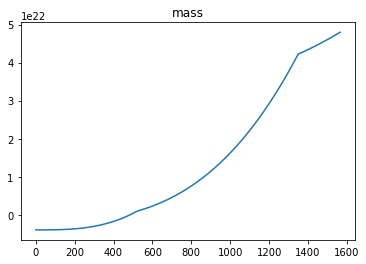

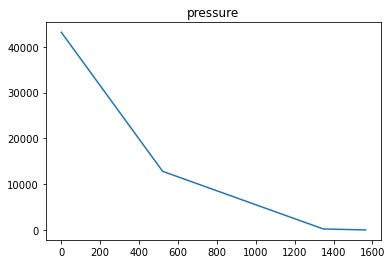

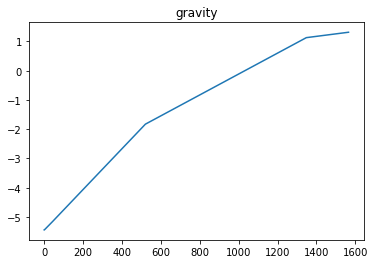

In [20]:
print(len(radius))
radiuskm = np.divide(np.array(radius),1000)
print(mass[-1])

# fig= plt.subplots(figsize=(14,9))

plt.plot(radiuskm,density)
plt.title('density')
plt.show()
plt.plot(radiuskm,mass)
plt.title('mass')
plt.show()
plt.plot(radiuskm,pressrue)
plt.title('pressure')
plt.show()
plt.plot(radiuskm,gravity)
plt.title('gravity')
plt.show()


In [21]:
print(radius)


[1565000.0, 1564500.0, 1564000.0, 1563500.0, 1563000.0, 1562500.0, 1562000.0, 1561500.0, 1561000.0, 1560500.0, 1560000.0, 1559500.0, 1559000.0, 1558500.0, 1558000.0, 1557500.0, 1557000.0, 1556500.0, 1556000.0, 1555500.0, 1555000.0, 1554500.0, 1554000.0, 1553500.0, 1553000.0, 1552500.0, 1552000.0, 1551500.0, 1551000.0, 1550500.0, 1550000.0, 1549500.0, 1549000.0, 1548500.0, 1548000.0, 1547500.0, 1547000.0, 1546500.0, 1546000.0, 1545500.0, 1545000.0, 1544500.0, 1544000.0, 1543500.0, 1543000.0, 1542500.0, 1542000.0, 1541500.0, 1541000.0, 1540500.0, 1540000.0, 1539500.0, 1539000.0, 1538500.0, 1538000.0, 1537500.0, 1537000.0, 1536500.0, 1536000.0, 1535500.0, 1535000.0, 1534500.0, 1534000.0, 1533500.0, 1533000.0, 1532500.0, 1532000.0, 1531500.0, 1531000.0, 1530500.0, 1530000.0, 1529500.0, 1529000.0, 1528500.0, 1528000.0, 1527500.0, 1527000.0, 1526500.0, 1526000.0, 1525500.0, 1525000.0, 1524500.0, 1524000.0, 1523500.0, 1523000.0, 1522500.0, 1522000.0, 1521500.0, 1521000.0, 1520500.0, 1520000.0